In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

1. Read the dataset and understand the features and target variable. 4 points
2. Encode independent features. 4 points
3. Separate the dependant variable from the rest of the train data 2 point
4. Split the dataset into training and test data ( Take 80:20 ratio). 2 points
5. Apply PCA on the independent features of train data. 2 point
6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 6 points
7. Transform the data using PCA ( select optimum number of PCs). 4 points
8. Apply KMeans algorithm on the above transformed data. 6 points
9. Select optimal number of clusters and form clusters out of the train data. 10 points
10. Create a new column in the train data and populate it with the cluster labels. 4 points
11. Transform the test data using the same PCA object that was fit on the train data. 4 points
12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 4 points
13. Apply SVC model on train dataset and predict target for test dataset. 6 points
14. Check accuracy and confusion matrix. 2 point

1.Read the dataset and understand the features and target variable

In [2]:
df = pd.read_csv('Qualitative_Bankruptcy.data.txt', sep=",", header=None)
df.columns = ['industrial_risk', 'management_risk', 'financial_flexibility',
              'credibility', 'competitiveness', 'operating_risk', 'class']

It is evident from the data that "Class" is our Target Variable.

In [3]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


2.Encode independent features

In [4]:
#one hot encode data
df_industrial = pd.get_dummies(df.industrial_risk)
df_management = pd.get_dummies(df.management_risk)
df_financial = pd.get_dummies(df.financial_flexibility)
df_crdibility = pd.get_dummies(df.credibility)
df_compete = pd.get_dummies(df.competitiveness)
df_operating = pd.get_dummies(df.operating_risk)

In [5]:
df_industrial.head()

,A,N,P
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0


In [6]:
#Encoding Class Variable where NB = 0 & B = 1
cleanup_nums = {"class":{"NB":0, "B":1}}
df.replace(cleanup_nums, inplace=True)
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,P,P,A,A,A,P,0
1,N,N,A,A,A,N,0
2,A,A,A,A,A,A,0
3,P,P,P,P,P,P,0
4,N,N,P,P,P,N,0


In [7]:
#combine data
df_new = pd.concat([df_industrial,df_management,df_financial,df_crdibility,df_compete,
                    df_operating, df['class']],axis=1)

In [8]:
df_new.head()

,A,N,P,A,N,P,A,N,P,A,N,P,A,N,P,A,N,P,class
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0


3. Separate the dependant variable from the rest of the train data

In [9]:
#split data
X = df_new.drop('class', axis=1)
y = df_new['class']

4.Split the dataset into training and test data ( Take 80:20 ratio)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

5. Apply PCA on the independent features of train data

In [11]:
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [12]:
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('\n')
print('Eigenvectors \n%s' %e_vecs)
print('\n')
print('Eigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00502513e+00 -5.21805733e-01 -4.56818004e-01  2.81675613e-01
  -2.49126864e-01 -4.79997101e-03  4.83687348e-02  1.87220378e-02
  -7.32692257e-02  1.97181829e-02 -5.73051764e-02  4.07410366e-02
   8.78963827e-02 -5.34612320e-02 -2.29334225e-02  2.09457204e-01
  -1.55436454e-01 -2.14753674e-02]
 [-5.21805733e-01  1.00502513e+00 -5.27913217e-01 -3.23648839e-01
   4.02723095e-01 -1.29721879e-01 -1.08656752e-01  1.40380954e-01
  -4.86081240e-02 -7.47948148e-02  5.34618086e-02  1.99156171e-02
  -1.37704825e-01  2.79633517e-01 -1.65400606e-01 -7.14639504e-02
   1.61178133e-01 -1.09906551e-01]
 [-4.56818004e-01 -5.27913217e-01  1.00502513e+00  5.68608176e-02
  -1.71679791e-01  1.39976462e-01  6.50849888e-02 -1.64946899e-01
   1.23610045e-01  5.83195516e-02  1.33724188e-03 -6.13198864e-02
   5.60036376e-02 -2.38208297e-01  1.95215667e-01 -1.34064751e-01
  -1.32217619e-02  1.35927523e-01]
 [ 2.81675613e-01 -3.23648839e-01  5.68608176e-02  1.00502513e+00
  -5.96151773e-

6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance).

In [13]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 25.13090588  37.17723147  47.90957415  57.55714332  65.82739295
  73.55269303  80.27008587  86.2856921   91.78644234  96.47605555
  98.81616631 100.         100.         100.         100.
 100.         100.         100.        ]


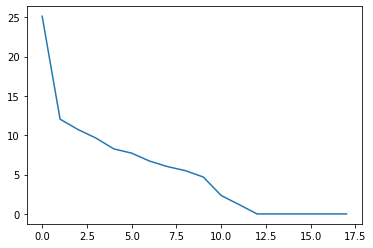

In [14]:
plt.plot(var_exp)

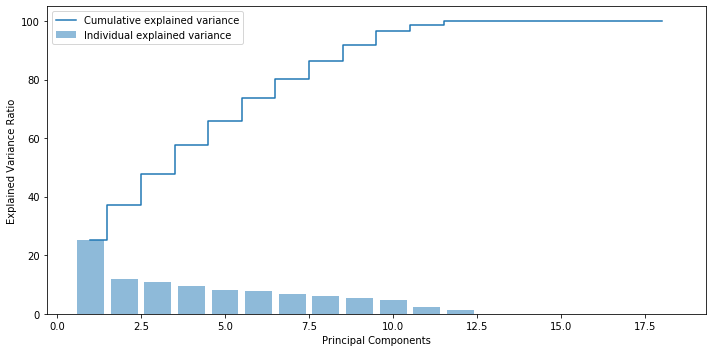

In [15]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#we can observe that 95% of variation can be explained by having at least 10 components only but to be on a safer side,
#we will take number of components as 12

7. Transform the data using PCA ( select optimum number of PCs).

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
data_reduced = pca.fit_transform(X_train_sd)
data_reduced.transpose()

array([[ 3.27831417, -2.05760884,  3.27831417, ...,  2.22475241,
        -0.67603736, -2.90485447],
       [-1.30511321,  0.27715424, -1.30511321, ...,  2.35034756,
        -2.28316788, -0.58218846],
       [ 0.14036309,  2.03193028,  0.14036309, ...,  0.95986963,
        -0.08217332, -0.15216074],
       ...,
       [-0.03948807, -0.52367327, -0.03948807, ...,  0.3018731 ,
         0.53182664, -0.48513957],
       [-0.25445132,  0.76648598, -0.25445132, ...,  0.07465994,
         0.30388291, -0.41533505],
       [ 0.21456613, -0.30539526,  0.21456613, ...,  0.02316499,
         0.11441809, -0.09289138]])

In [17]:
data_reduced

array([[ 3.27831417, -1.30511321,  0.14036309, ..., -0.03948807,
        -0.25445132,  0.21456613],
       [-2.05760884,  0.27715424,  2.03193028, ..., -0.52367327,
         0.76648598, -0.30539526],
       [ 3.27831417, -1.30511321,  0.14036309, ..., -0.03948807,
        -0.25445132,  0.21456613],
       ...,
       [ 2.22475241,  2.35034756,  0.95986963, ...,  0.3018731 ,
         0.07465994,  0.02316499],
       [-0.67603736, -2.28316788, -0.08217332, ...,  0.53182664,
         0.30388291,  0.11441809],
       [-2.90485447, -0.58218846, -0.15216074, ..., -0.48513957,
        -0.41533505, -0.09289138]])

8. Apply KMeans algorithm on the above transformed data

In [18]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [19]:
cluster_errors = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_reduced)
    kmeanModel.fit(data_reduced)
    cluster_errors.append(kmeanModel.inertia_)
cluster_df= pd.DataFrame({"num_clusters":K, "cluster_errors":cluster_errors})
print("Clusters Range and the Error Values:\n",cluster_df)

Clusters Range and the Error Values:
     num_clusters  cluster_errors
0              1     3600.000000
1              2     2786.196888
2              3     2525.086537
3              4     2307.799879
4              5     2149.047954
5              6     1987.571762
6              7     1908.253282
7              8     1801.607929
8              9     1718.895131
9             10     1657.126262
10            11     1545.750369
11            12     1491.968232
12            13     1454.262018
13            14     1379.872354
14            15     1309.585743
15            16     1262.032618
16            17     1260.597409
17            18     1180.022397
18            19     1149.650918


9. Select optimal number of clusters and form clusters out of the train data

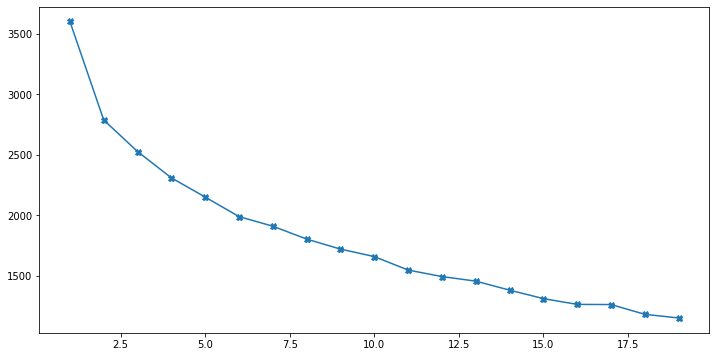

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters,cluster_df.cluster_errors,marker="X")

In [21]:
#it is evident from the elbow plot that only 2 clusters are required, however we will check the silhouette analysis also to be sure.

For n_clusters = 2 The average silhouette_score is : 0.2185855947593181


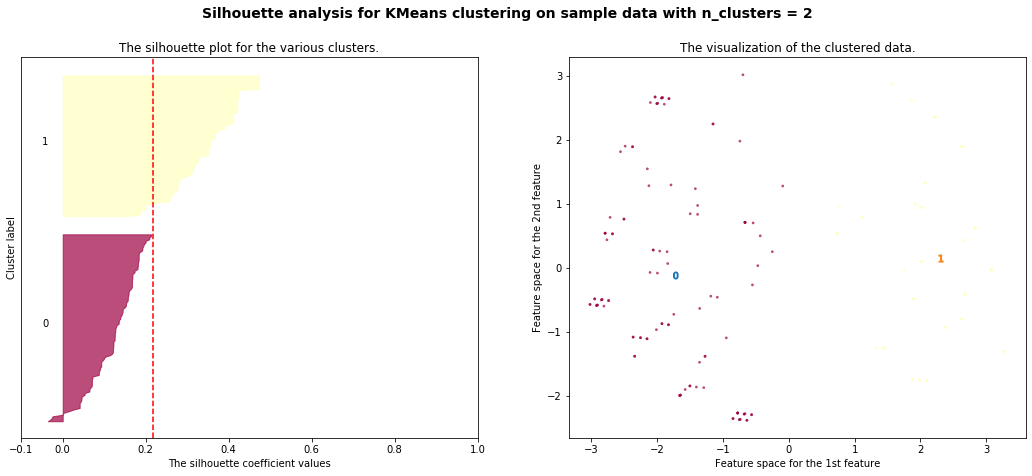

For n_clusters = 3 The average silhouette_score is : 0.22525689115938902


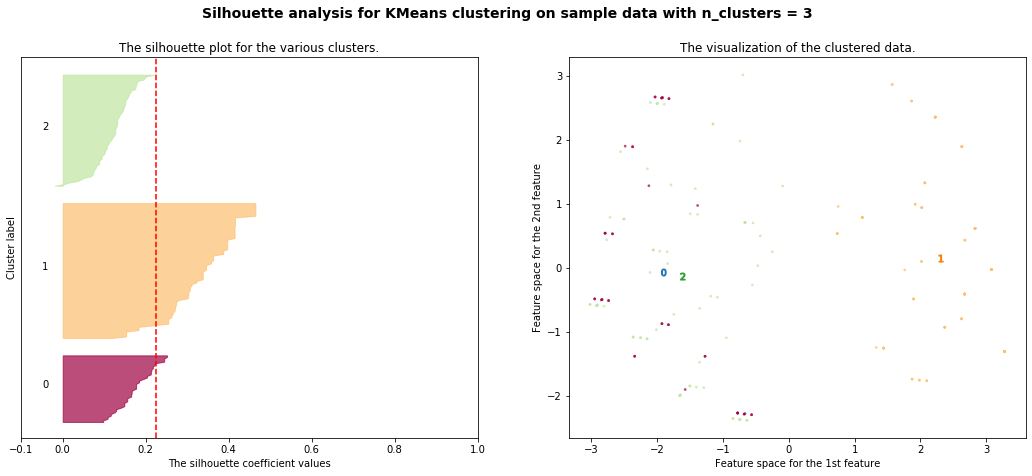

For n_clusters = 4 The average silhouette_score is : 0.21720896085705513


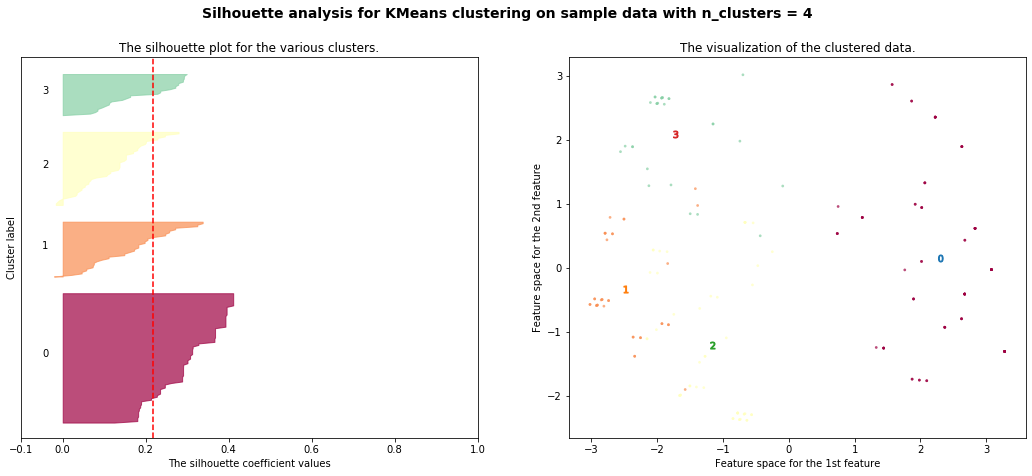

For n_clusters = 5 The average silhouette_score is : 0.16774546785101996


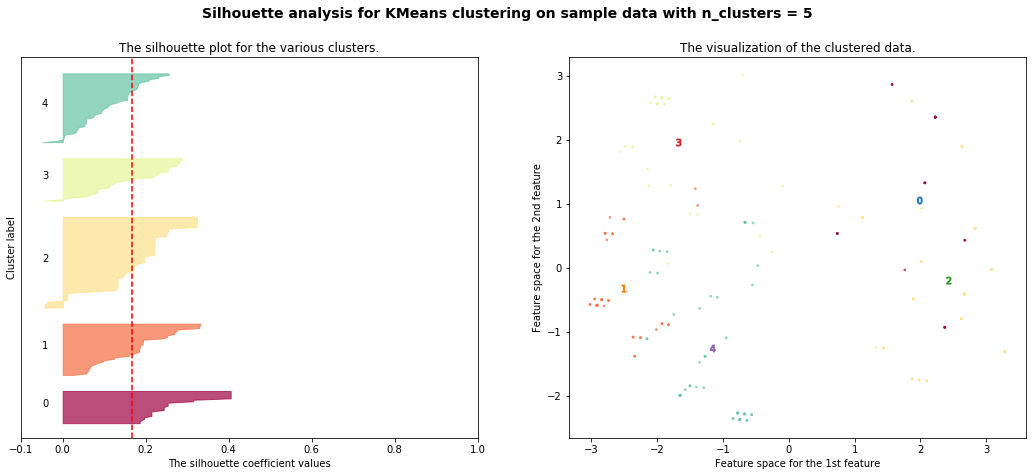

For n_clusters = 6 The average silhouette_score is : 0.17756639176254452


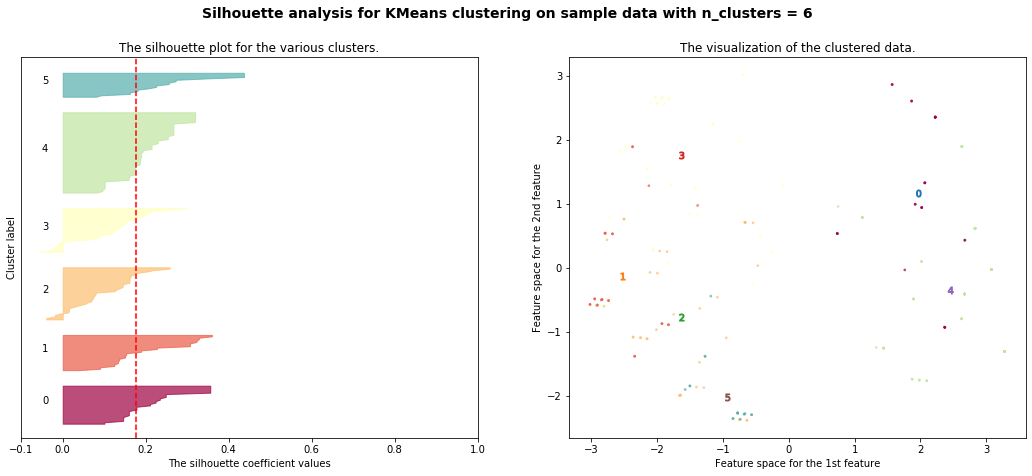

In [22]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_reduced) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_reduced, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_reduced[:, 0], data_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [23]:
#rom Silhouette Analysis also, it is evident that there should be only 2 clusters

In [24]:
kmeans = KMeans(n_clusters=2)

In [25]:
kmeans.fit(data_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
kmeans.labels_

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0])

In [27]:
data_reduced_df = pd.DataFrame(data_reduced)

10. Create a new column in the train data and populate it with the cluster labels.

In [28]:
data_reduced_df['label'] = kmeans.labels_

In [29]:
data_reduced_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,label
0,3.278314,-1.305113,0.140363,0.134896,-0.298005,-0.329339,0.067378,0.001959,0.358556,-0.039488,-0.254451,0.214566,1
1,-2.057609,0.277154,2.031930,-0.070149,-1.709765,-0.082770,2.239813,-1.172786,0.337512,-0.523673,0.766486,-0.305395,0
2,3.278314,-1.305113,0.140363,0.134896,-0.298005,-0.329339,0.067378,0.001959,0.358556,-0.039488,-0.254451,0.214566,1
3,-1.958710,0.260481,3.431292,0.547830,-0.521162,0.730051,0.858800,0.645641,0.958523,0.034471,0.816537,-0.350142,0
4,-3.016962,-0.572442,0.100645,-1.407848,-2.063842,1.526047,-0.039524,-0.863593,-1.423221,-0.261063,-0.103619,-0.383487,0


11. Transform the test data using the same PCA object that was fit on the train data

In [30]:
data_reduced_test = pca.transform(X_test_sd)

In [31]:
data_reduced_test

array([[-2.67803394e+00,  2.46833163e-01,  8.51777981e-01,
         4.63333508e-01, -9.74397442e-01,  6.04907460e-01,
        -2.78090398e+00,  9.90081012e-01, -4.31135319e-01,
         1.10990315e+00, -7.43617824e-01, -2.49342537e-01],
       [-1.97858855e+00,  2.41665668e+00,  1.67055914e-01,
         2.21520619e+00, -1.05176476e+00, -4.89089864e-01,
         8.44297581e-01, -1.14382748e+00, -5.61424786e-01,
        -7.89799979e-01, -2.21357302e-01, -3.98777896e-01],
       [-1.97858855e+00,  2.41665668e+00,  1.67055914e-01,
         2.21520619e+00, -1.05176476e+00, -4.89089864e-01,
         8.44297581e-01, -1.14382748e+00, -5.61424786e-01,
        -7.89799979e-01, -2.21357302e-01, -3.98777896e-01],
       [ 2.14416546e+00, -1.99993522e+00, -2.43257486e-01,
         2.04333876e-01,  1.51955559e+00, -1.32534146e+00,
        -5.18719359e-01, -7.01692038e-01,  5.02419153e-01,
        -3.22248122e-01,  1.51302443e+00, -1.42088403e-01],
       [-1.31143065e+00,  8.00640789e-01, -2.1077873

12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature.

In [32]:
kmeans.fit(data_reduced_test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
kmeans.labels_

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0])

In [34]:
data_reduced_test_df = pd.DataFrame(data_reduced_test)

In [35]:
data_reduced_test_df['label'] = kmeans.labels_

In [36]:
data_reduced_test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,label
0,-2.678034,0.246833,0.851778,0.463334,-0.974397,0.604907,-2.780904,0.990081,-0.431135,1.109903,-0.743618,-0.249343,0
1,-1.978589,2.416657,0.167056,2.215206,-1.051765,-0.489090,0.844298,-1.143827,-0.561425,-0.789800,-0.221357,-0.398778,0
2,-1.978589,2.416657,0.167056,2.215206,-1.051765,-0.489090,0.844298,-1.143827,-0.561425,-0.789800,-0.221357,-0.398778,0
3,2.144165,-1.999935,-0.243257,0.204334,1.519556,-1.325341,-0.518719,-0.701692,0.502419,-0.322248,1.513024,-0.142088,1
4,-1.311431,0.800641,-2.107787,-0.758647,-1.580291,0.006222,-1.557748,1.880704,-0.144497,0.678153,1.049359,1.408100,0


13. Apply SVC model on train dataset and predict target for test dataset.

In [37]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)


14. Check accuracy and confusion matrix. 2 point

In [38]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

1.0
1.0


In [39]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[29  0]
 [ 0 21]]
